In [2]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve, PrecisionRecallDisplay, average_precision_score, f1_score
import warnings

In [3]:
# Creating DataFrames and removing index created during feature_engineering export
X_df = pd.read_csv("/workspace/anomaly_lte/data/x_test_processed_ft2.csv")
Y_df = pd.read_csv("/workspace/anomaly_lte/data/Y_test.csv")

X_df = X_df.iloc[:,1:]
Y_df = Y_df.iloc[:,1:]

In [4]:
# Obtaining models
with open('models/train_dtree_ft2.pkl', 'rb') as model_file:
    dtree = pickle.load(model_file)

with open('models/train_xgboost_ft2.pkl', 'rb') as model_file:
    xgboost = pickle.load(model_file)

Score for Decision Tree model: 0.9655873187914916
f1: 0.9351378958120531

Classification Report for Decision Tree model:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5346
           1       0.97      0.90      0.94      2035

    accuracy                           0.97      7381
   macro avg       0.97      0.95      0.96      7381
weighted avg       0.97      0.97      0.97      7381


Confusion Matrix for Decision Tree model: 
[[5296   50]
 [ 204 1831]]


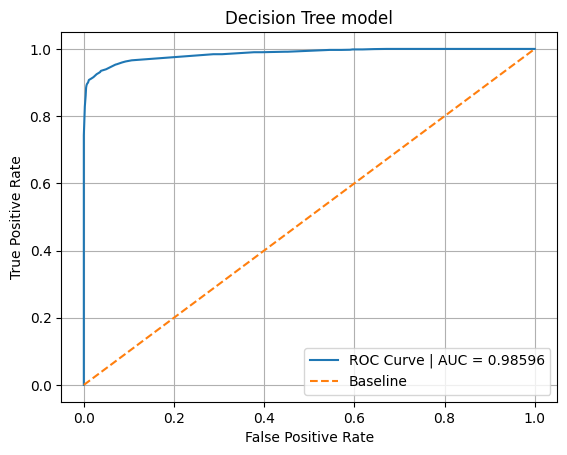

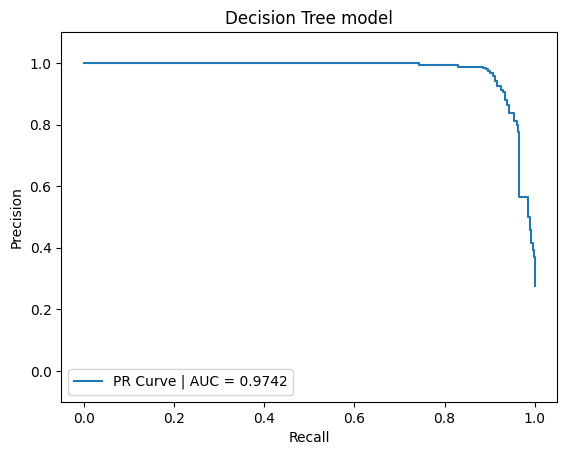

In [5]:
# Evaluating metrics for decision tree
predicted_probability = dtree.predict_proba(X_df)[:,1]
predicted_outcome = dtree.predict(X_df)

# Printing Score
score = dtree.score(X_df, Y_df)
print(f"Score for Decision Tree model: {score}")

# Printing F1 score with higher dp
f1 = f1_score(Y_df, predicted_outcome)
print(f"f1: {f1}")

# Printing Classification Report
cr = classification_report(Y_df, predicted_outcome)   
print(f"\nClassification Report for Decision Tree model:\n{cr}")

# Printing Confusion Matrix
cm = confusion_matrix(Y_df, predicted_outcome)
print(f"\nConfusion Matrix for Decision Tree model: \n{cm}")

# Getting ROC and AUC
false_positive_rate, true_positive_rate, roc_thresholds = roc_curve(Y_df, predicted_probability)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Getting PRD and AUC
precision, recall, prd_threshold = precision_recall_curve(Y_df, predicted_probability)
prd_auc = average_precision_score(Y_df, predicted_probability)

# Plotting ROC Curve
plt.plot(false_positive_rate, true_positive_rate, label = f"ROC Curve | AUC = {round(roc_auc,5)}")
plt.plot([0,1], [0,1], linestyle = '--', label = "Baseline")
plt.title("Decision Tree model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()
plt.show()

# Plotting Precision Recall Display
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot(label = f"PR Curve | AUC = {round(prd_auc,5)}")
plt.title("Decision Tree model")
plt.ylim(-0.1,1.1)
plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

Score for xgboost model: 0.9895678092399404
f1: 0.9807162534435263

Classification Report for xgboost model:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5346
           1       1.00      0.96      0.98      2035

    accuracy                           0.99      7381
   macro avg       0.99      0.98      0.99      7381
weighted avg       0.99      0.99      0.99      7381


Confusion Matrix for xgboost model: 
[[5346    0]
 [  77 1958]]


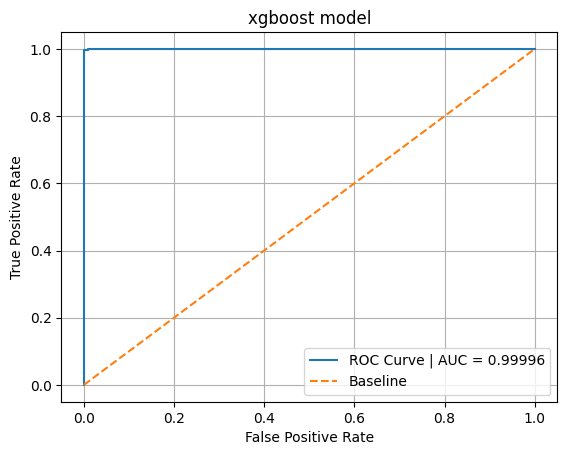

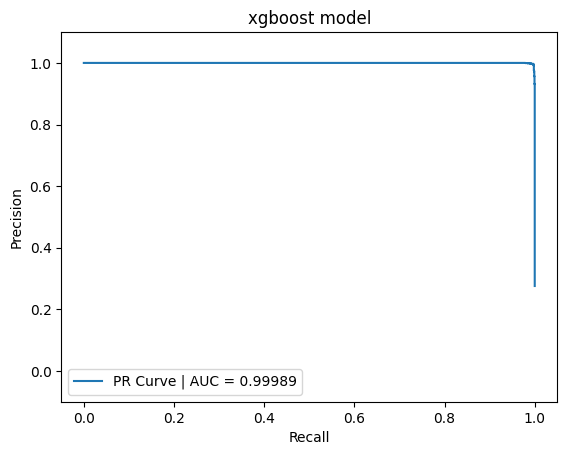

[0.00000000e+00 4.91400491e-04 1.38574939e-01 1.39557740e-01
 7.44471744e-01 7.45454545e-01 9.76412776e-01 9.77886978e-01
 9.79361179e-01 9.79361179e-01 9.84275184e-01 9.84275184e-01
 9.88206388e-01 9.88206388e-01 9.91646192e-01 9.91646192e-01
 9.92628993e-01 9.92628993e-01 9.97051597e-01 9.97051597e-01
 9.97542998e-01 9.97542998e-01 9.98034398e-01 9.98034398e-01
 9.98034398e-01 9.98034398e-01 9.98525799e-01 9.98525799e-01
 9.99017199e-01 9.99017199e-01 9.99508600e-01 9.99508600e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]


In [6]:
# Evaluating metrics for xgboost
predicted_probability = xgboost.predict_proba(X_df)[:,1]
predicted_outcome = xgboost.predict(X_df)

# Printing Score
score = xgboost.score(X_df, Y_df)
print(f"Score for xgboost model: {score}")

# Printing F1 score with higher dp
f1 = f1_score(Y_df, predicted_outcome)
print(f"f1: {f1}")

# Printing Classification Report
cr = classification_report(Y_df, predicted_outcome)   
print(f"\nClassification Report for xgboost model:\n{cr}")

# Printing Confusion Matrix
cm = confusion_matrix(Y_df, predicted_outcome)
print(f"\nConfusion Matrix for xgboost model: \n{cm}")

# Getting ROC and AUC
false_positive_rate, true_positive_rate, roc_thresholds = roc_curve(Y_df, predicted_probability)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Getting PRD and AUC
precision, recall, prd_threshold = precision_recall_curve(Y_df, predicted_probability)
prd_auc = average_precision_score(Y_df, predicted_probability)

# Plotting ROC Curve
plt.plot(false_positive_rate, true_positive_rate, label = f"ROC Curve | AUC = {round(roc_auc,5)}")
plt.plot([0,1], [0,1], linestyle = '--', label = "Baseline")
plt.title("xgboost model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()
plt.show()

# Plotting Precision Recall Display
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot(label = f"PR Curve | AUC = {round(prd_auc,5)}")
plt.title("xgboost model")
plt.ylim(-0.1,1.1)
plt.show()
print(true_positive_rate)

# Removing warning displays for xgboost
warnings.filterwarnings('ignore')

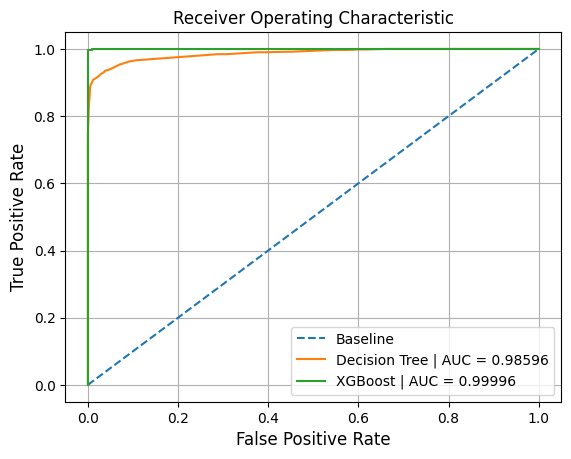

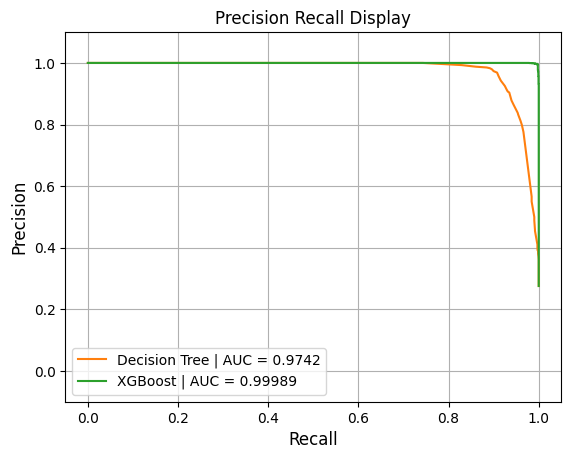

In [7]:
# Evaluating metrics for both
predicted_probability = dtree.predict_proba(X_df)[:,1]
predicted_outcome = dtree.predict(X_df)

predicted_probability_2 = xgboost.predict_proba(X_df)[:,1]
predicted_outcome_2 = xgboost.predict(X_df)

# Getting ROC and AUC
false_positive_rate, true_positive_rate, roc_thresholds = roc_curve(Y_df, predicted_probability)
roc_auc = auc(false_positive_rate, true_positive_rate)

false_positive_rate2, true_positive_rate2, roc_thresholds2 = roc_curve(Y_df, predicted_probability_2)
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)

# Plotting ROC Curve
plt.plot([0,1], [0,1], linestyle = '--', label = "Baseline")
plt.plot(false_positive_rate, true_positive_rate, label = f"Decision Tree | AUC = {round(roc_auc,5)}")
plt.plot(false_positive_rate2, true_positive_rate2, label = f"XGBoost | AUC = {round(roc_auc2,5)}")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.grid()
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.show()

# Getting PRD and AUC for both
precision, recall, prd_threshold = precision_recall_curve(Y_df, predicted_probability)
prd_auc = average_precision_score(Y_df, predicted_probability)

precision2, recall2, prd_threshold2 = precision_recall_curve(Y_df, predicted_probability_2)
prd_auc2 = average_precision_score(Y_df, predicted_probability_2)

# Plotting Precision Recall Display for both
plt.plot(recall, precision, label = f"Decision Tree | AUC = {round(prd_auc, 5)}", color = "C1")
plt.plot(recall2, precision2, label = f"XGBoost | AUC = {round(prd_auc2, 5)}", color = "C2")
plt.ylim(-0.1, 1.1)
plt.grid()
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision Recall Display")
plt.legend()
plt.show()

# Removing warning displays for xgboost
warnings.filterwarnings('ignore')
